## 作業目標:

    使用 CIFAR100 理解數據集變大的影響
    
## 作業重點:

    了解 CIFAR100 跟 CIFAR10 數據及差異


## 參考資料

[CIFAR-10 和 CIFAR-100 的資料集說明](https://www.cs.toronto.edu/~kriz/cifar.html)

[Keras: Dataset](https://keras.io/datasets/)

[Keras: Deep Learning for humans](https://github.com/keras-team/keras/)

[Predicting Boston House Prices](https://www.kaggle.com/sagarnildass/predicting-boston-house-prices)

### Imagenet

Imagenet 數據集有 1400 多萬幅圖片，涵蓋 2 萬多個類別；其中有超過百萬的圖片有明確的類別標註和圖像中物體位置的標註。

Imagenet 數據集是目前深度學習圖像領域應用得非常多的一個領域，關於圖像分類、定位、檢測等研究工作大多基於此數據集展開。Imagenet 數據集文檔詳細，有專門的團隊維護，使用非常方便，在計算機視覺領域研究論文中應用非常廣，幾乎成為了目前深度學習圖像領域算法性能檢驗的標準數據集，數據集大小約 1TB（ILSVRC2016比賽全部數據）。

[參考連結](http://www.image-net.org/about-stats)

### COCO

COCO(Common Objects in Context)是一個新的圖像識別、分割和圖像語義數據集。

COCO 數據集由微軟贊助，其對於圖像的標註信息不僅有類別、位置信息，還有對圖像的語義文本描述，COCO 數據集的開源使得近兩三年來圖像分割語義理解取得了巨大的進展，也幾乎成為了圖像語義理解算法性能評價的標準數據集。Google 開源的圖說生成模型 show and tell 就是在此數據集上測試的，想玩的可以下來試試。數據集大小約 40GB。

[參考連結](http://mscoco.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar100

np.random.seed(100)

Using TensorFlow backend.


## 資料準備

In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data()

169009152/169001437 [==============================] - 46s 0us/step


In [3]:
print('x_img_train.shape:', x_img_train.shape)
print('y_label_train.shape:', y_label_train.shape)
print('x_img_test.shape:', x_img_test.shape)
print('y_label_test.shape:', y_label_test.shape)

x_img_train.shape: (50000, 32, 32, 3)
y_label_train.shape: (50000, 1)
x_img_test.shape: (10000, 32, 32, 3)
y_label_test.shape: (10000, 1)


In [4]:
label_dict = {
    0: 'apple',
    1: 'aquarium_fish',
    2: 'baby',
    3: 'bear',
    4: 'beaver',
    5: 'bed',
    6: 'bee',
    7: 'beetle',
    8: 'bicycle',
    9: 'bottle',
    10: 'bowl',
    11: 'boy',
    12: 'bridge',
    13: 'bus',
    14: 'butterfly',
    15: 'camel',
    16: 'can',
    17: 'castle',
    18: 'caterpillar',
    19: 'cattle',
    20: 'chair',
    21: 'chimpanzee',
    22: 'clock',
    23: 'cloud',
    24: 'cockroach',
    25: 'couch',
    26: 'crab',
    27: 'crocodile',
    28: 'cup',
    29: 'dinosaur',
    30: 'dolphin',
    31: 'elephant',
    32: 'flatfish',
    33: 'forest',
    34: 'fox',
    35: 'girl',
    36: 'hamster',
    37: 'house',
    38: 'kangaroo',
    39: 'computer_keyboard',
    40: 'lamp',
    41: 'lawn_mower',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    45: 'lobster',
    46: 'man',
    47: 'maple_tree',
    48: 'motorcycle',
    49: 'mountain',
    50: 'mouse',
    51: 'mushroom',
    52: 'oak_tree',
    53: 'orange',
    54: 'orchid',
    55: 'otter',
    56: 'palm_tree',
    57: 'pear',
    58: 'pickup_truck',
    59: 'pine_tree',
    60: 'plain',
    61: 'plate',
    62: 'poppy',
    63: 'porcupine',
    64: 'possum',
    65: 'rabbit',
    66: 'raccoon',
    67: 'ray',
    68: 'road',
    69: 'rocket',
    70: 'rose',
    71: 'sea',
    72: 'seal',
    73: 'shark',
    74: 'shrew',
    75: 'skunk',
    76: 'skyscraper',
    77: 'snail',
    78: 'snake',
    79: 'spider',
    80: 'squirrel',
    81: 'streetcar',
    82: 'sunflower',
    83: 'sweet_pepper',
    84: 'table',
    85: 'tank',
    86: 'telephone',
    87: 'television',
    88: 'tiger',
    89: 'tractor',
    90: 'train',
    91: 'trout',
    92: 'tulip',
    93: 'turtle',
    94: 'wardrobe',
    95: 'whale',
    96: 'willow_tree',
    97: 'wolf',
    98: 'woman',
    99: 'worm'
}

In [5]:
def plot_images_labels_prediction(x_img, y_label):
    fig = plt.gcf()
    fig.set_size_inches(12, 50)
    img_category_amount = len(label_dict)
    for i in range(img_category_amount):
        ax = plt.subplot(img_category_amount / 5, 5, i + 1)
        ax.imshow(x_img[i], cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'{i}: {label_dict[y_label[i][0]]}', fontsize=10) 
    plt.show()

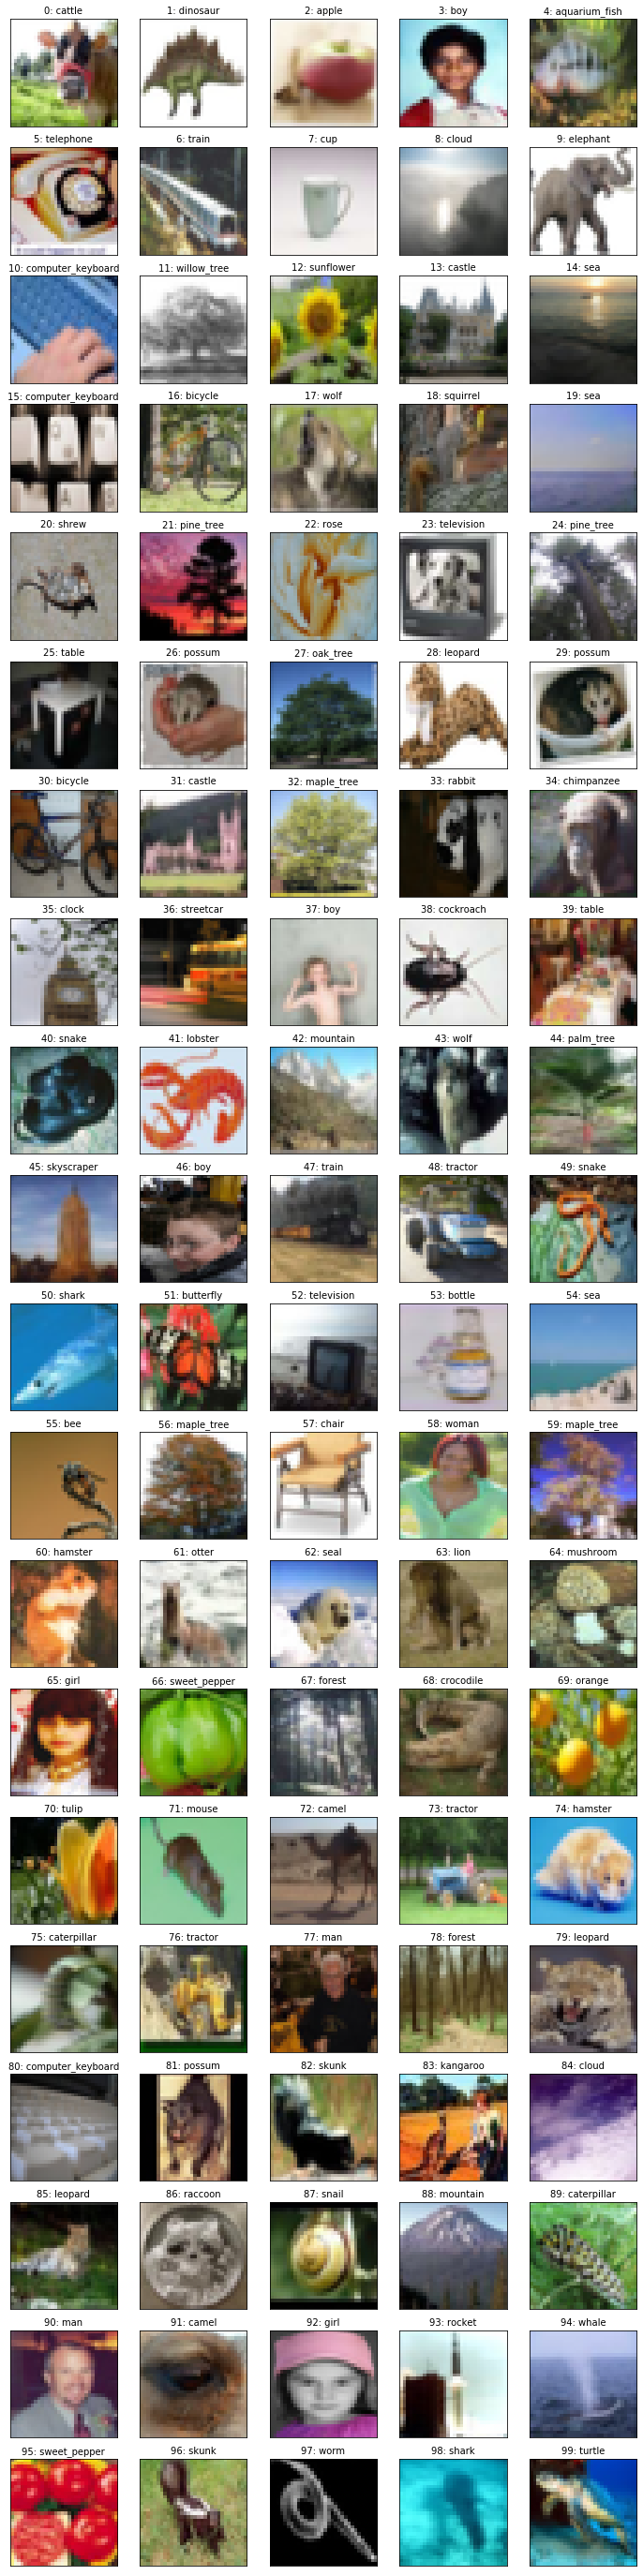

In [6]:
plot_images_labels_prediction(x_img_train, y_label_train)

## 影像正規化

In [7]:
print('Before normalization:')
x_img_train[:5, :1, :1]

Before normalization:


array([[[[255, 255, 255]]],


       [[[255, 255, 255]]],


       [[[250, 250, 248]]],


       [[[124, 194, 221]]],


       [[[ 43,  49,  46]]]], dtype=uint8)

In [8]:
print('After normalization:')
x_img_norm_train = x_img_train.astype('float32') / 255.0
x_img_norm_test = x_img_test.astype('float32') / 255.0
x_img_norm_train[:5, :1, :1]

After normalization:


array([[[[1.        , 1.        , 1.        ]]],


       [[[1.        , 1.        , 1.        ]]],


       [[[0.98039216, 0.98039216, 0.972549  ]]],


       [[[0.4862745 , 0.7607843 , 0.8666667 ]]],


       [[[0.16862746, 0.19215687, 0.18039216]]]], dtype=float32)

## 轉換 label 為 OneHot Encoding

Keras 要求對輸出做獨熱編碼才能進行訓練

In [9]:
y_label_onehot_train = np_utils.to_categorical(y_label_train)
y_label_onehot_test = np_utils.to_categorical(y_label_test)
print('y_label_onehot_train.shape:', y_label_onehot_train.shape)
print('y_label_onehot_train[:5]:')
print(y_label_onehot_train[:5])

y_label_onehot_train.shape: (50000, 100)
y_label_onehot_train[:5]:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
